In [1]:
import pandas as pd
import re

In [2]:
import os
 
# Function to Get the current
# working directory
def current_path():
    print("Current working directory before")
    print(os.getcwd())
    print()
current_path()
os.chdir('D:\Binar')
current_path()

Current working directory before
C:\Users\HP

Current working directory before
D:\Binar



In [3]:
df = pd.read_fwf("D:/Binar/Data/challenge/train_preprocess.txt", header = None)
df_coba = df[0].tolist()
df_str = str(df_coba)
df_sp = df_str.split()

In [4]:
df0 = df.loc[:,[0]]

In [5]:
def cari(text):
    hasil = re.findall("\t[a-zA-Z]*", text)
    return hasil

In [6]:
df0["label"] =pd.DataFrame(map(cari, df_coba))

In [7]:
def tanda(label):
    if label == "\tpositive":
        sub = "positive"
    elif label == "\tneutral":
        sub = "neutral"
    else:
        sub = "negative"
    return sub

In [8]:
df_label = df0["label"].tolist()
df0["label"] = pd.DataFrame(map(tanda, df_label))
df0

,0,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa\tpositive,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi\tn...,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [9]:
df0.rename(columns = {0:"tulisan"}, inplace = True)
df0

,tulisan,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative
...,...,...
10995,tidak kecewa\tpositive,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai-partai yang telah berkoalisi\tn...,neutral
10998,"pagi pagi di tol pasteur sudah macet parah , b...",negative


In [10]:
real = df0["tulisan"]

In [11]:
#lowering
def cleansing(text):
    text = text.lower()
    text = re.sub('\t[a-zA-Z]*',' ', text)
    text = re.sub('[^a-zA-Z0-9]',' ', text)
    text = re.sub('x[a-z0-9]{1,2}',' ', text)
    text = re.sub('\s+',' ', text)
    return text
ltext = real.apply(cleansing)
ltext

0        warung ini dimiliki oleh pengusaha pabrik tahu...
1        mohon ulama lurus dan k212 mmbri hujjah partai...
2        lokasi strategis di jalan sumatera bandung tem...
3        betapa bahagia nya diri ini saat unbo g paket ...
4        duh jadi mahasiswa jangan sombong dong kasih k...
                               ...                        
10995                                        tidak kecewa 
10996    enak rasa masakan nya apalagi kepiting yang me...
10997         hormati partai partai yang telah berkoalisi 
10998    pagi pagi di tol pasteur sudah macet parah bik...
10999    meskipun sering belanja ke yogya di riau junct...
Name: tulisan, Length: 11000, dtype: object

In [12]:
df = pd.DataFrame(ltext)
df["label"] = df0["label"]
df

,tulisan,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung tem...,positive
3,betapa bahagia nya diri ini saat unbo g paket ...,positive
4,duh jadi mahasiswa jangan sombong dong kasih k...,negative
...,...,...
10995,tidak kecewa,positive
10996,enak rasa masakan nya apalagi kepiting yang me...,positive
10997,hormati partai partai yang telah berkoalisi,neutral
10998,pagi pagi di tol pasteur sudah macet parah bik...,negative


In [14]:
neg = df.loc[df['label'] == 'negative'].tulisan.tolist()
neu = df.loc[df['label'] == 'neutral'].tulisan.tolist()
pos = df.loc[df['label'] == 'positive'].tulisan.tolist()

neg_label = df.loc[df['label'] == 'negative'].label.tolist()
neu_label = df.loc[df['label'] == 'neutral'].label.tolist()
pos_label = df.loc[df['label'] == 'positive'].label.tolist()

In [15]:
total_data = pos + neu + neg
labels = pos_label + neu_label + neg_label

print("Pos: %s, Neu: %s, Neg: %s" % (len(pos), len(neu), len(neg)))
print("Total data: %s" % len(total_data))

Pos: 6325, Neu: 1148, Neg: 3527
Total data: 11000


In [16]:
import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [17]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_labels.pickle has created!")

y_labels.pickle has created!


In [18]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_labels.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [19]:
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

In [20]:
embed_dim = 100
units = 64

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.2))
model.add(Dense(3,activation='softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
print(model.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 77, 100)           10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


None
Epoch 1/10
880/880 [==============================] - 160s 173ms/step - loss: 0.4923 - accuracy: 0.8010 - val_loss: 0.3320 - val_accuracy: 0.8782
Epoch 2/10
880/880 [==============================] - 141s 160ms/step - loss: 0.2277 - accuracy: 0.9190 - val_loss: 0.3358 - val_accuracy: 0.8727
Epoch 2: early stopping


In [21]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing selesai")
print(matrix_test)

69/69 [==============================] - 4s 33ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       700
           1       0.82      0.80      0.81       236
           2       0.88      0.94      0.91      1264

    accuracy                           0.87      2200
   macro avg       0.86      0.84      0.85      2200
weighted avg       0.87      0.87      0.87      2200



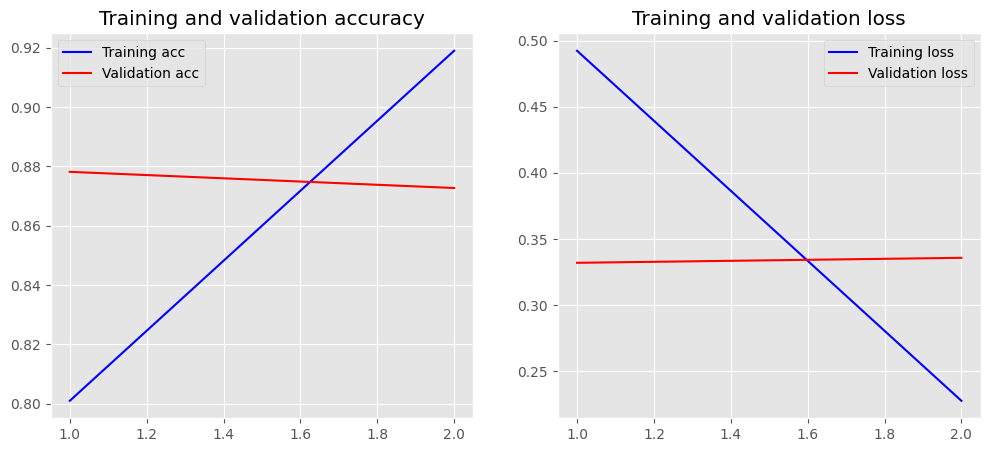

In [22]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

In [23]:
model.save('modellstm.h5')
print("Model has created!")

Model has created!
